In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [2]:
train=pd.read_excel('Flight_Data_Train.xlsx')
test=pd.read_excel('Flight_Test_set.xlsx')
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
print(train.shape)
print(test.shape)
train_features=train.columns
test_features=test.columns
print(train_features)
print('-'*60)
print(test_features)
combine=(train,test)

(10683, 11)
(2671, 10)
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')
------------------------------------------------------------
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')


In [4]:
print(train.info())
print('-'*30)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 500.8+ KB
None
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arriv

In [5]:
print(train.isnull().sum())
print('-'*25)
print(test.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
-------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [6]:
train=train.dropna()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


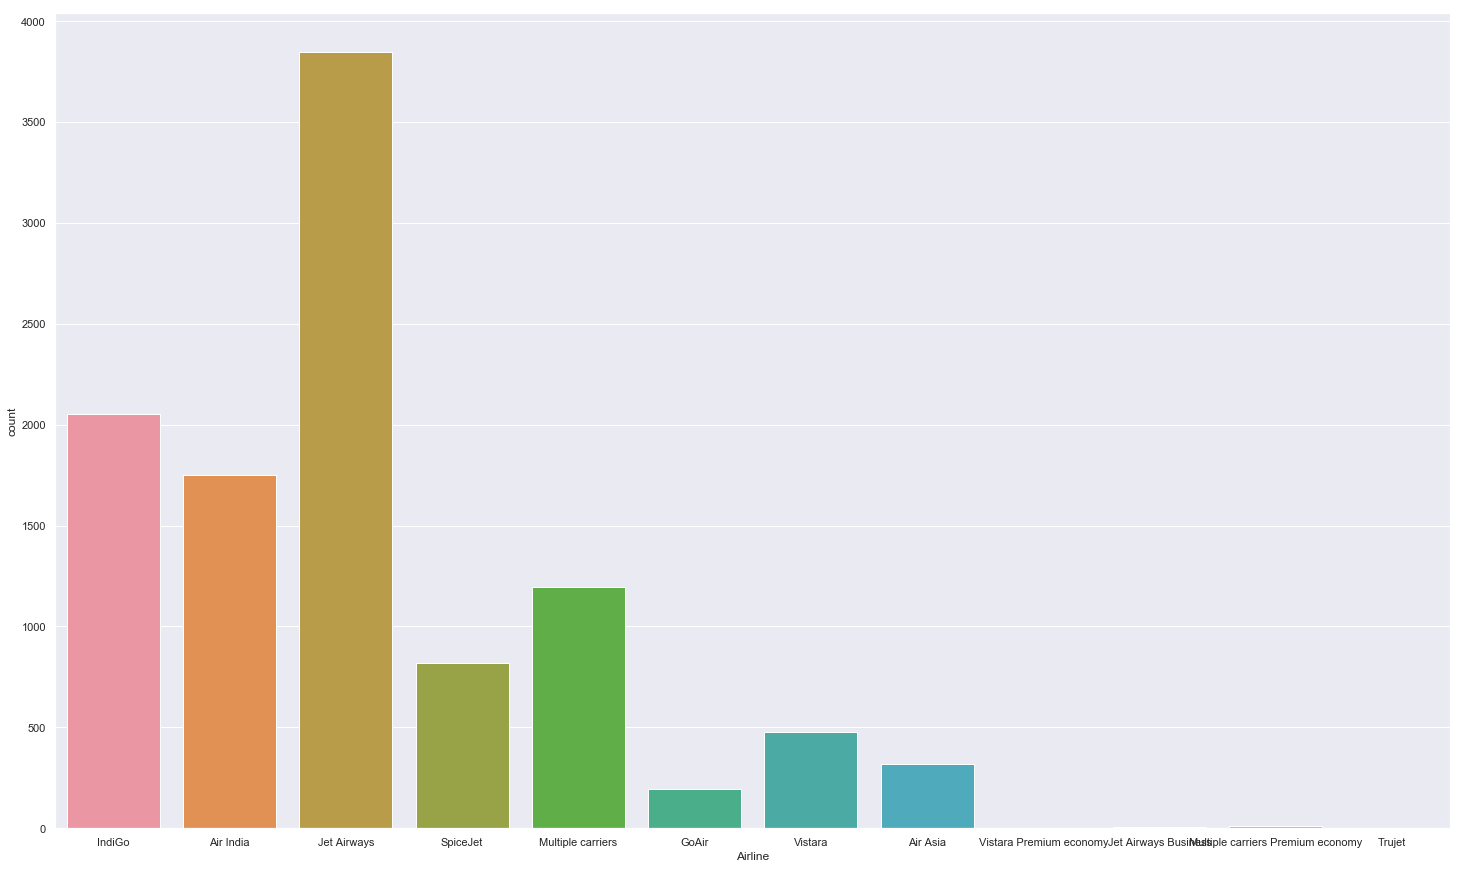

In [7]:
#flight count
print(train['Airline'].value_counts())
sns.set(rc={'figure.figsize':(25,15)})
sns.countplot(train['Airline'])

In [8]:
pd.crosstab(train['Source'],train['Destination']) # shows the busiest route

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1265,0,0,932
Chennai,0,0,0,0,381,0
Delhi,0,4536,0,0,0,0
Kolkata,2871,0,0,0,0,0
Mumbai,0,0,0,697,0,0


1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


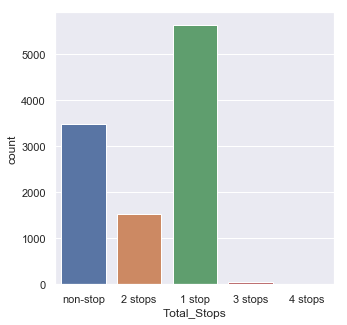

In [9]:
print(train['Total_Stops'].value_counts())
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(train['Total_Stops'])

In [10]:
print(train['Additional_Info'].value_counts())
#sns.set(rc={'figure.figsize':(25,10)})
#sns.countplot(train['Additional_Info'])

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


In [11]:
#finding the maximum and minimum price of a flight
print(train.loc[train['Price'].idxmax()])
print('-'*50)
print(train.loc[train['Price'].idxmin()])

Airline            Jet Airways Business
Date_of_Journey              01/03/2019
Source                         Banglore
Destination                   New Delhi
Route                   BLR → BOM → DEL
Dep_Time                          05:45
Arrival_Time                      11:25
Duration                         5h 40m
Total_Stops                      1 stop
Additional_Info          Business class
Price                             79512
Name: 2924, dtype: object
--------------------------------------------------
Airline                SpiceJet
Date_of_Journey      21/03/2019
Source                   Mumbai
Destination           Hyderabad
Route                 BOM → HYD
Dep_Time                  22:45
Arrival_Time       00:10 22 Mar
Duration                 1h 25m
Total_Stops            non-stop
Additional_Info         No info
Price                      1759
Name: 4066, dtype: object


In [12]:
# training data
train['J_day']=pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.day
train['J_month']=pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.month
# test data
test['J_day']=pd.to_datetime(test.Date_of_Journey, format='%d/%m/%Y').dt.day
test['J_month']=pd.to_datetime(test.Date_of_Journey, format='%d/%m/%Y').dt.month
# deleting orginal journey date
train.drop('Date_of_Journey', axis = 1, inplace = True)
test.drop('Date_of_Journey', axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

In [13]:
# for train data
duration = list(train['Duration'])
for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
            #print(duration[i])
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())
            #print(duration[i])
no_of_hours = []
no_of_minutes = []  

for i in range(len(duration)) :
    hours=duration[i].split()[0][:-1]
    minutes=int(duration[i].split()[1][:-1])
    no_of_hours.append(int(hours))
    #print(no_of_hours)
    no_of_minutes.append(minutes)
    
train['Duration_hours'] = no_of_hours
train['Duration_minutes'] =no_of_minutes
train.drop(labels = 'Duration', axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
# for test data
duration_test = list(test['Duration'])
for i in range(len(duration_test)) :
    if len(duration_test[i].split()) != 2:
        if 'h' in duration_test[i] :
            duration_test[i] = duration_test[i].strip() + ' 0m'
            #print(duration[i])
        elif 'm' in duration_test[i] :
            duration_test[i] = '0h {}'.format(duration_test[i].strip())
            #print(duration[i])
no_of_hours = []
no_of_minutes = []  

for i in range(len(duration_test)) :
    hours=duration_test[i].split()[0][:-1]
    minutes=int(duration_test[i].split()[1][:-1])
    no_of_hours.append(int(hours))
    #print(no_of_hours)
    no_of_minutes.append(minutes)
    
test['Duration_hours'] = no_of_hours
test['Duration_minutes'] =no_of_minutes
test.drop(labels = 'Duration', axis = 1, inplace = True)


In [15]:
# Training Set
train['Depart_Time_Hour'] = pd.to_datetime(train.Dep_Time).dt.hour
train['Depart_Time_Minutes'] = pd.to_datetime(train.Dep_Time).dt.minute
train.drop(labels = 'Dep_Time', axis = 1, inplace = True)
train['Arr_Time_Hour'] = pd.to_datetime(train.Arrival_Time).dt.hour
train['Arr_Time_Minutes'] = pd.to_datetime(train.Arrival_Time).dt.minute
train.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [16]:
# Test Set
test['Depart_Time_Hour'] = pd.to_datetime(test.Dep_Time).dt.hour
test['Depart_Time_Minutes'] = pd.to_datetime(test.Dep_Time).dt.minute
test.drop(labels = 'Dep_Time', axis = 1, inplace = True)
test['Arr_Time_Hour'] = pd.to_datetime(test.Arrival_Time).dt.hour
test['Arr_Time_Minutes'] = pd.to_datetime(test.Arrival_Time).dt.minute
test.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Training Set
train_columns=train.iloc[:,0:6]
test_columns=test.columns[:6]
#print(train_columns)
for i in train_columns:
    train[i]= le.fit_transform(train[i])
for j in test_columns:
    test[j]= le.fit_transform(test[j])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,J_day,J_month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,3,0,5,18,4,8,3897,24,3,2,50,22,20,1,10
1,1,3,0,84,1,8,7662,1,5,7,25,5,50,13,15
2,4,2,1,118,1,8,13882,9,6,19,0,9,25,4,25
3,3,3,0,91,0,8,6218,12,5,5,25,18,5,23,30
4,3,0,5,29,0,8,13302,1,3,4,45,16,50,21,35


In [19]:
test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,J_day,J_month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,4,2,1,76,0,5,6,6,10,55,17,30,4,25
1,3,3,0,65,0,5,12,5,4,0,6,20,10,20
2,4,2,1,76,0,3,21,5,23,45,19,15,19,0
3,6,2,1,76,0,5,21,5,13,0,8,0,21,0
4,0,0,2,16,4,5,24,6,2,50,23,55,2,45


In [20]:
x= train.iloc[:,train.columns != 'Price']
y= train.iloc[:,6]
x_testing = test.iloc[:,:]

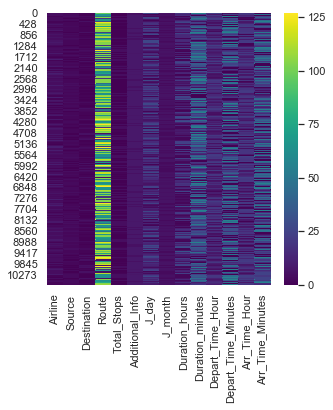

In [21]:
sns.heatmap(x,cmap='viridis')

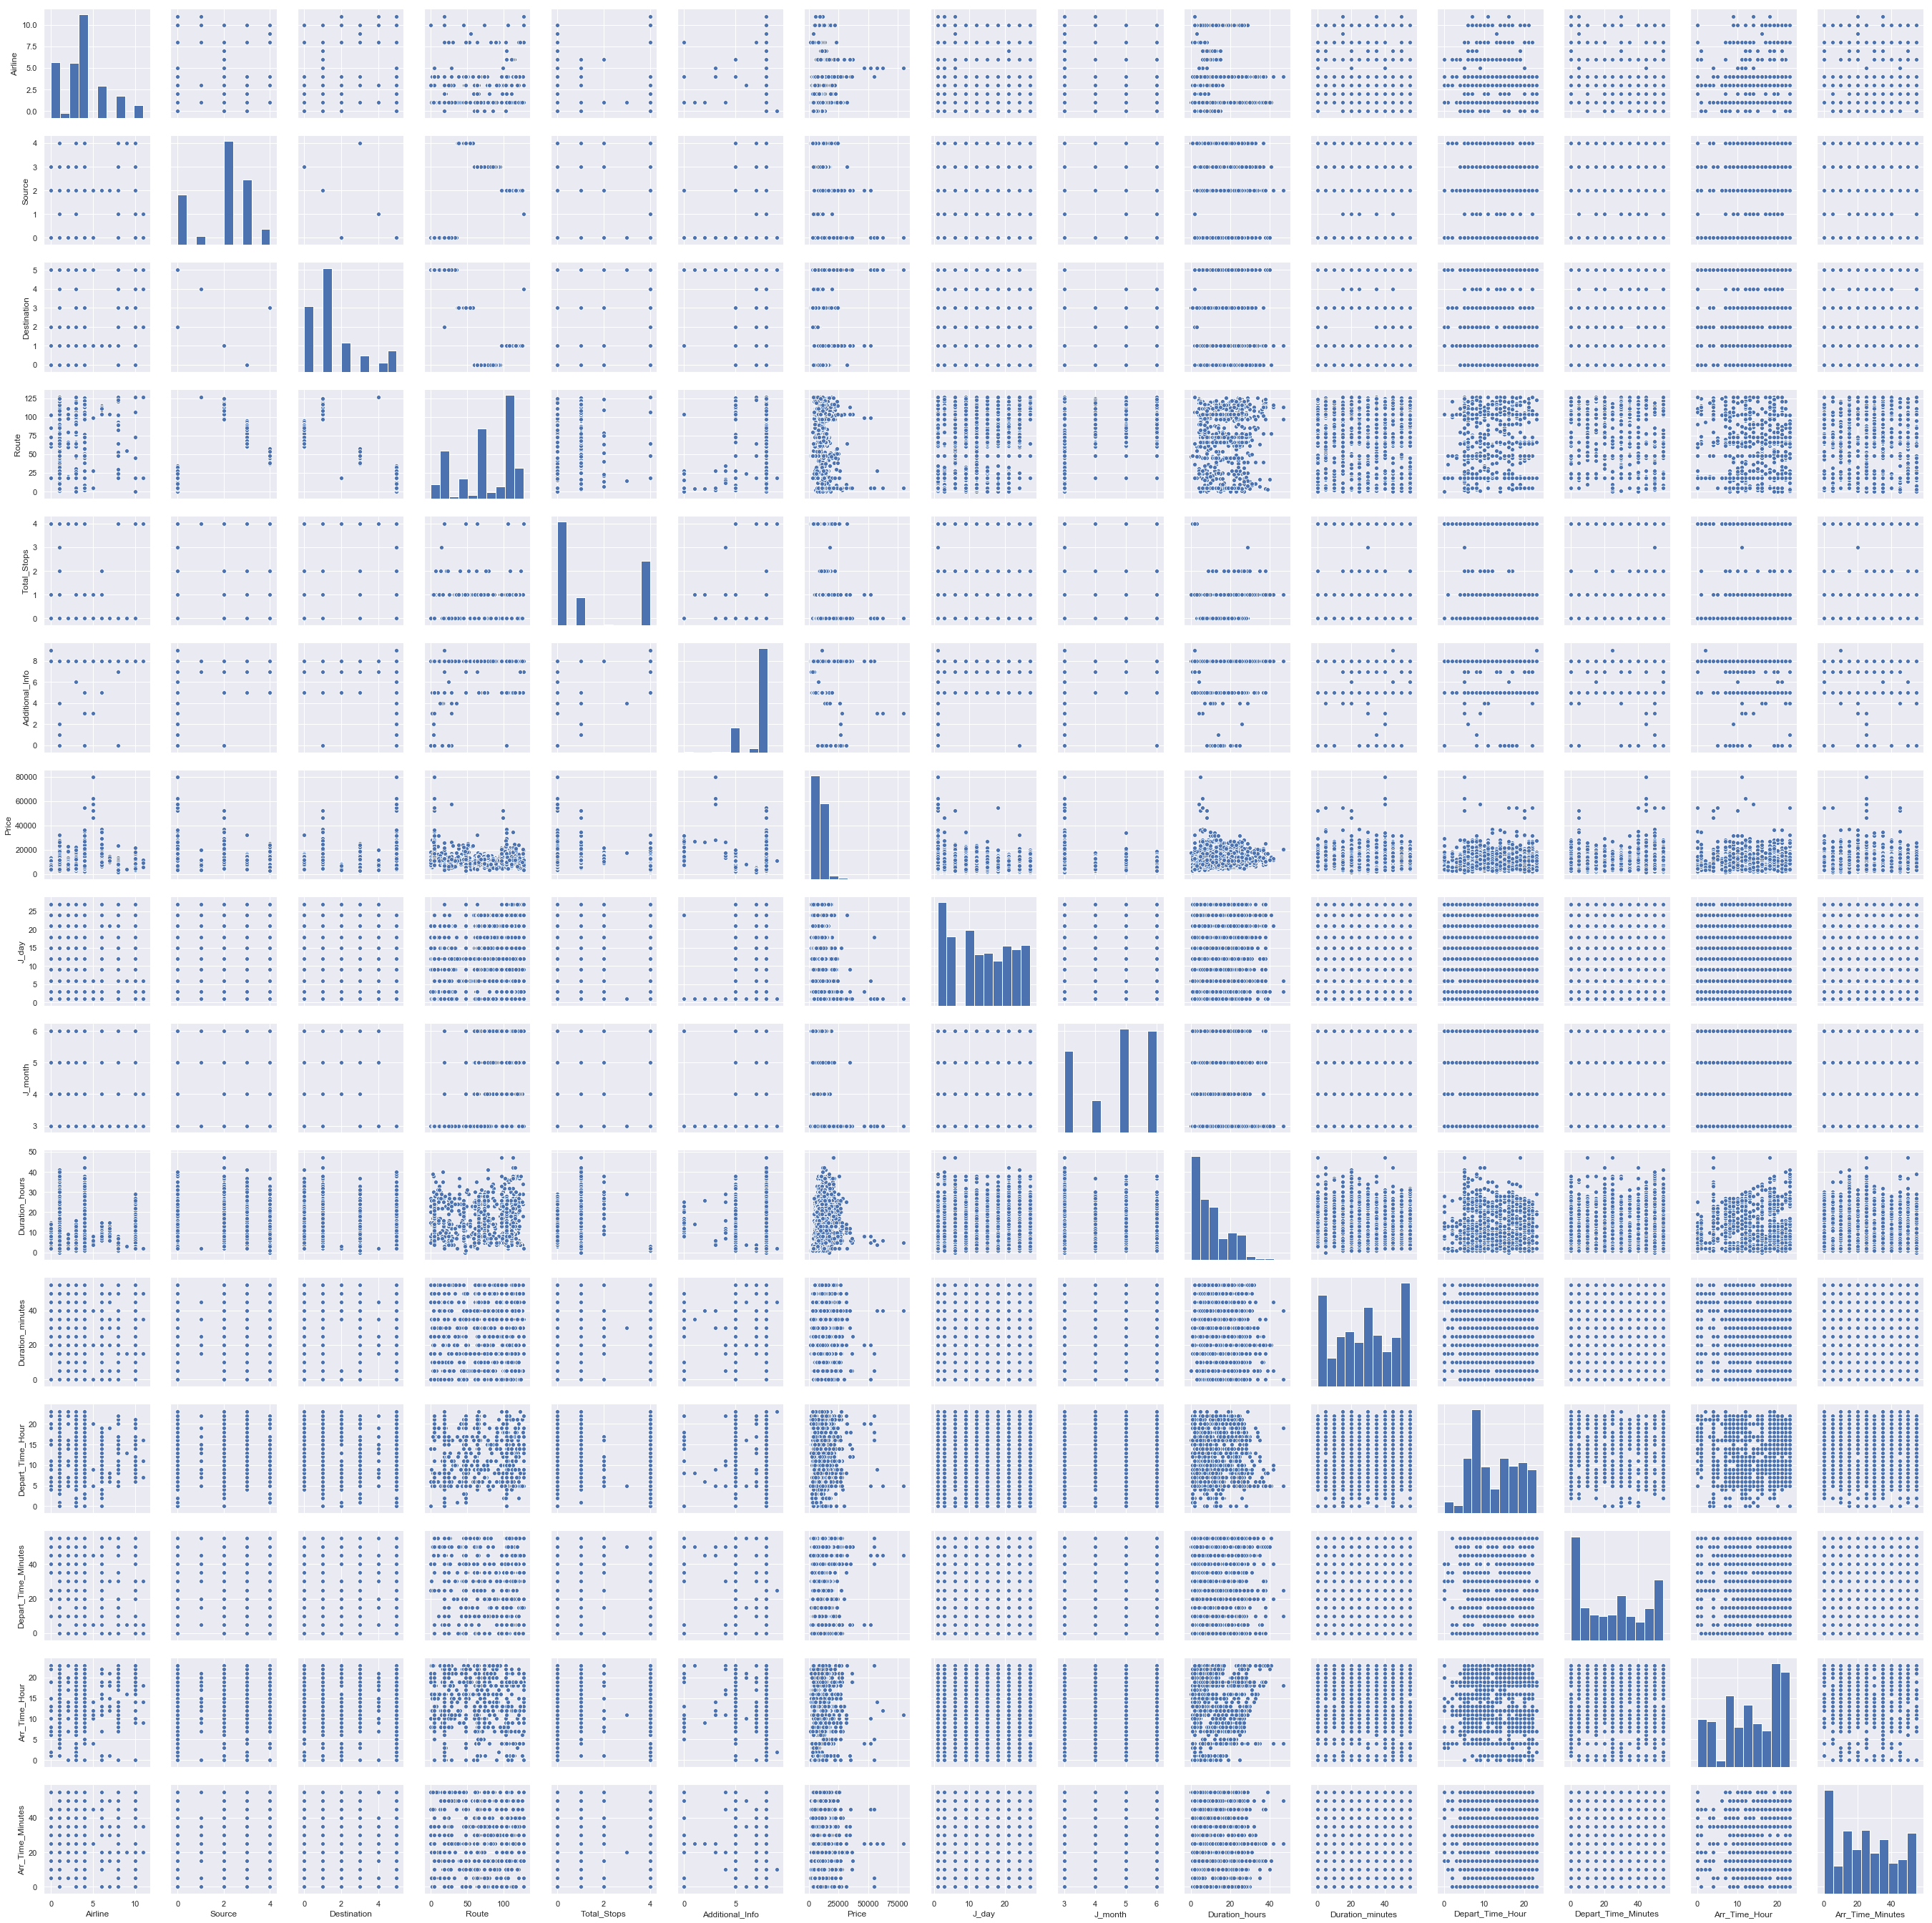

In [22]:
sns.pairplot(train)

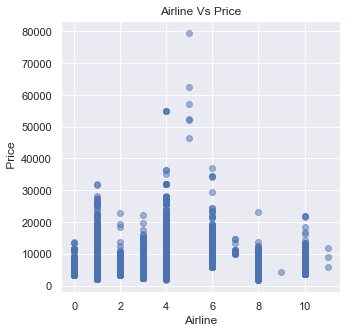

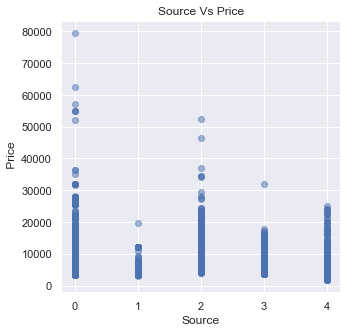

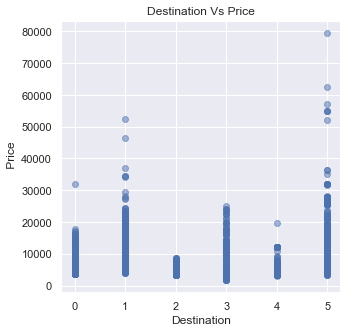

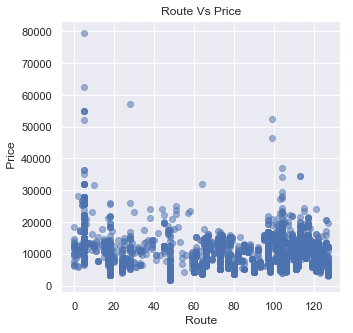

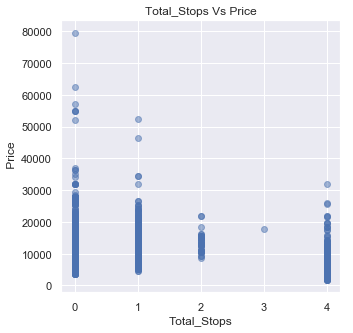

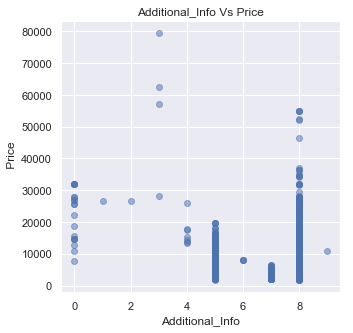

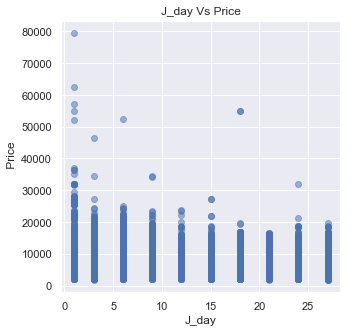

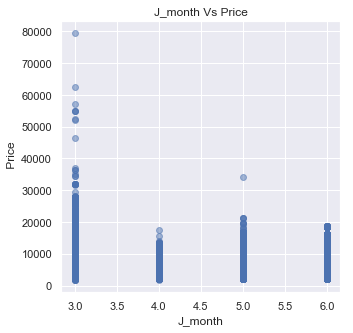

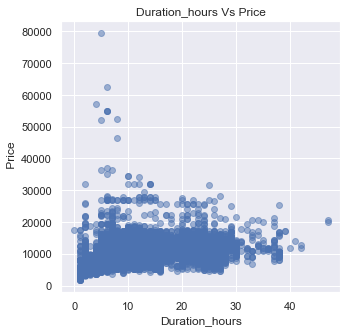

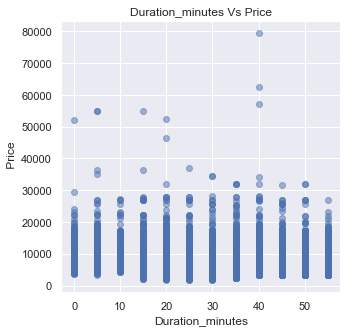

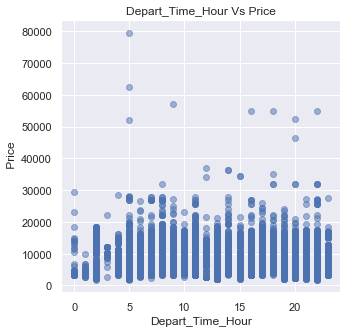

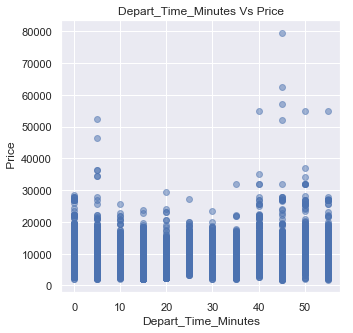

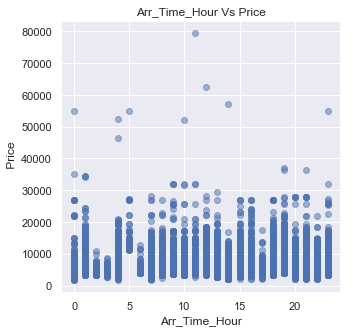

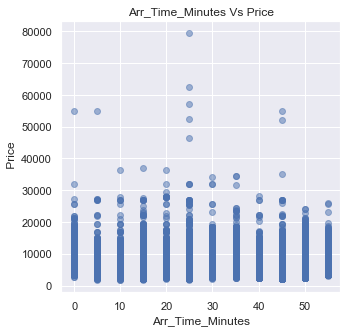

In [23]:
cols=x.columns
def scatter_plot (cols):
    for col in cols:
        x_ax= x[col]
        y_ax= y
        plt.figure(figsize=(5,5))
        plt.scatter(x_ax,y_ax,alpha=0.5)
        plt.title(col+' Vs Price')
        plt.xlabel(col)
        plt.ylabel(' Price')
scatter_plot(cols)

In [24]:
ss=StandardScaler()
x_trans=ss.fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Using train_test_split 

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x_trans,y,test_size=0.30,random_state=41)

In [26]:
lr=LinearRegression()
lr.fit(x_train,y_train)
score=lr.score(x_train,y_train)
print('Model Score :',score)
#print('Accuracy Score:',accuracy_score(pred,y_test))

Model Score : 0.4237396496245589


In [27]:
lasso=Lasso()
lasso.fit(x_train,y_train)
la_score=lasso.score(x_train,y_train)
print('Model Score :',la_score)

Model Score : 0.42373893649238836


In [28]:
ridge=Ridge()
ridge.fit(x_train,y_train)
rid_score=ridge.score(x_train,y_train)
print('Model Score :',rid_score)

Model Score : 0.42373964294688493


In [29]:
rfr=RandomForestRegressor(n_estimators=100,random_state=1)
rfr.fit(x_train,y_train)
rfr_score=rfr.score(x_train,y_train)
print('Model Score :',rfr_score)

Model Score : 0.979752053017557


In [30]:
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
abr_score=abr.score(x_train,y_train)
print('Model Score :',abr_score)

Model Score : 0.417297844386456


In [40]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr_score=gbr.score(x_train,y_train)
print('Model Score :',gbr_score)

Model Score : 0.8482531930392165


In [31]:
svr=SVR(gamma='auto',kernel='linear')
svr.fit(x_train,y_train)
svr_score=svr.score(x_train,y_train)
print('Model Score :',svr_score)

Model Score : 0.3494238297183313


In [32]:
import pickle
file_name=open('best_model.obj','wb')
pickle.dump(rfr,file_name)
file_name.close()

In [33]:
model=pickle.load(open('best_model.obj','rb'))
model.fit(x,y)
pred=model.predict(x_testing)
pred


array([10099.4775    ,  5099.92      , 20981.53166667, ...,
       12912.4175    , 11392.3       ,  7802.5925    ])

In [34]:
flight_price=pd.DataFrame(pred,columns=['Price']).to_excel('Flight_price.xlsx',index=False)
data=pd.read_excel('Flight_price.xlsx')
data.head()

,Price
0,10099.477500
1,5099.920000
2,20981.531667
3,9212.620500
4,4374.730000


Using the randomized search cv to avoid overfiting

In [35]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [36]:
rfr_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,
         'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [37]:
rfr =RandomForestRegressor()

In [38]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
best_rfr_tree=RandomizedSearchCV(estimator=rfr,param_distributions=rfr_grid,n_jobs=-1,cv=3)

In [39]:
best_rfr_tree.fit(x_train,y_train)
print(best_rfr_tree.score(x_train,y_train))
best_rfr_tree.predict(x_testing)

0.9660771044619648


array([19926.35325983, 19623.48203761, 15756.55849931, ...,
       19926.35325983, 21047.89375738, 19926.35325983])